In [10]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

## Load data and set x, y, training and test sets

In [2]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

In [3]:
y = df['partner'] -1
x = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

x = pd.concat([x, pd.get_dummies(df['cntry'])], axis=1)
offset = int(x.shape[0] * 0.9)
x_train, y_train = x[:offset], y[:offset]
x_test, y_test = x[offset:], y[offset:]

## Model 1 - Base model

In [34]:
params = {'n_estimators': 500,
         'max_depth' : 2,
          'loss': 'deviance',
          'random_state': 448
         }

clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(x_train, y_train)

predict_train = clf.predict(x_train)
predict_test = clf.predict(x_test)

table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0, 1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0, 0.0] / table_train.loc['All', 'All']

test_tI_errors = table_test.loc[0.0, 1.0]/table_test.loc['All', 'All']
test_tII_errors = table_test.loc[1.0, 0.0]/table_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {} \n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012 

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


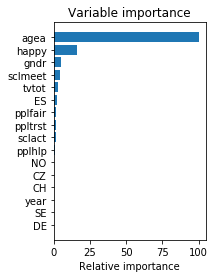

In [6]:
feature_importance = clf.feature_importances_
feature_importance = 100.0* (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x.columns[sorted_idx])
plt.xlabel('Relative importance')
plt.title('Variable importance')
plt.show()

## Model 2 - creating new features

In [8]:
x.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1,0,0,0,0,0
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1,0,0,0,0,0
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,1,0,0,0,0,0
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1,0,0,0,0,0
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1,0,0,0,0,0


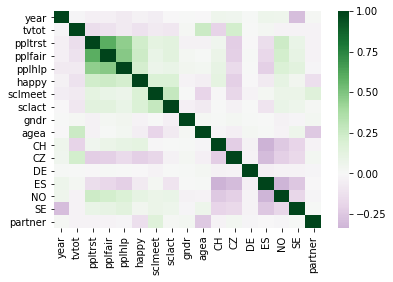

In [11]:
## Plot correlation map

x_y_train = x_train.copy()
x_y_train['partner'] = y_train
sns.heatmap(x_y_train.corr(), cmap='PRGn', center=0)
plt.show()

In [12]:
## Suspect there could be interaction between:
## - happiness and social meetups
## - happiness and social activities
## - happiness and age
## - ppltrst, pplfair and pplhlp

x_2 = x.copy()
x_2['happ_sclmeet'] = x_2['happy'] * x_2['sclmeet']
x_2['happ_sclact'] = x_2['happy'] * x_2['sclact']
x_2['happ_age'] = x_2['happy'] * x_2['agea']
x_2['trst_fair'] = x_2['ppltrst'] * x_2['pplfair']
x_2['trst_hlp'] = x_2['ppltrst'] * x_2['pplhlp']
x_2['fair_hlp'] = x_2['pplfair'] * x_2['pplhlp']

In [13]:
x_2_train = x_2[:offset]
x_2_test = x_2[offset:]

In [14]:
clf_2 = ensemble.GradientBoostingClassifier(**params)
clf_2.fit(x_2_train, y_train)

predict_2_train = clf_2.predict(x_2_train)
predict_2_test = clf_2.predict(x_2_test)

table_2_train = pd.crosstab(y_train, predict_2_train, margins=True)
table_2_test = pd.crosstab(y_test, predict_2_test, margins = True)

train_2_tI_errors = table_2_train.loc[0.0, 1.0] / table_2_train.loc['All', 'All']
train_2_tII_errors = table_2_train.loc[1.0, 0.0] / table_2_train.loc['All', 'All']

test_2_tI_errors = table_2_test.loc[0.0, 1.0] / table_2_test.loc['All', 'All']
test_2_tII_errors = table_2_test.loc[1.0, 0.0] / table_2_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_2_tI_errors, train_2_tII_errors, test_2_tI_errors, test_2_tII_errors))


Training set accuracy:
Percent Type I errors: 0.040780141843971635
Percent Type II errors: 0.1702127659574468

Test set accuracy:
Percent Type I errors: 0.06503067484662577
Percent Type II errors: 0.19141104294478528


In [15]:
## Training set has better accuracy but the test set does not.
## This suggests the additional features create more overfitting.


## Models 3-6 - Use subsampling to reduce overfitting

In [31]:
## Use original x, subsample = 0.5 and a random state for comparison

params_3 = {'n_estimators': 500,
         'max_depth' : 2,
          'loss': 'deviance',
          'subsample': 0.5,
            'random_state': 448
         }

clf_3 = ensemble.GradientBoostingClassifier(**params_3)
clf_3.fit(x_train, y_train)

predict_3_train = clf_3.predict(x_train)
predict_3_test = clf_3.predict(x_test)

table_3_train = pd.crosstab(y_train, predict_3_train, margins=True)
table_3_test = pd.crosstab(y_test, predict_3_test, margins=True)

train_3_tI_errors = table_3_train.loc[0.0, 1.0] / table_3_train.loc['All','All']
train_3_tII_errors = table_3_train.loc[1.0, 0.0] / table_3_train.loc['All', 'All']

test_3_tI_errors = table_3_test.loc[0.0, 1.0]/table_3_test.loc['All', 'All']
test_3_tII_errors = table_3_test.loc[1.0, 0.0]/table_3_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {} \n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_3_tI_errors, train_3_tII_errors, test_3_tI_errors, test_3_tII_errors))

Training set accuracy:
Percent Type I errors: 0.0463720676486634
Percent Type II errors: 0.17144026186579378 

Test set accuracy:
Percent Type I errors: 0.06503067484662577
Percent Type II errors: 0.1901840490797546


In [20]:
## Subsampling makes for slightly worse performance in the test
## set at = 0.5.

In [30]:
## Use original x, subsample of 0.75 and same random state

params_4 = {'n_estimators': 500,
         'max_depth' : 2,
          'loss': 'deviance',
          'subsample': 0.75,
            'random_state': 448
         }

clf_4 = ensemble.GradientBoostingClassifier(**params_4)
clf_4.fit(x_train, y_train)

predict_4_train = clf_4.predict(x_train)
predict_4_test = clf_4.predict(x_test)

table_4_train = pd.crosstab(y_train, predict_4_train, margins=True)
table_4_test = pd.crosstab(y_test, predict_4_test, margins=True)

train_4_tI_errors = table_4_train.loc[0.0, 1.0] / table_4_train.loc['All','All']
train_4_tII_errors = table_4_train.loc[1.0, 0.0] / table_4_train.loc['All', 'All']

test_4_tI_errors = table_4_test.loc[0.0, 1.0]/table_4_test.loc['All', 'All']
test_4_tII_errors = table_4_test.loc[1.0, 0.0]/table_4_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {} \n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_4_tI_errors, train_4_tII_errors, test_4_tI_errors, test_4_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04719039825422804
Percent Type II errors: 0.17157665030005456 

Test set accuracy:
Percent Type I errors: 0.07116564417177915
Percent Type II errors: 0.18159509202453988


In [22]:
## When subsampling is set to 0.75, the false positives increase by
## around 0.5% and false negatives decrease by a similar amount.

In [29]:
## Use original x, subsample = 0.25 and same random state

params_5 = {'n_estimators': 500,
         'max_depth' : 2,
          'loss': 'deviance',
          'subsample': 0.25,
            'random_state': 448
         }

clf_5 = ensemble.GradientBoostingClassifier(**params_5)
clf_5.fit(x_train, y_train)

predict_5_train = clf_5.predict(x_train)
predict_5_test = clf_5.predict(x_test)

table_5_train = pd.crosstab(y_train, predict_5_train, margins=True)
table_5_test = pd.crosstab(y_test, predict_5_test, margins=True)

train_5_tI_errors = table_5_train.loc[0.0, 1.0] / table_5_train.loc['All','All']
train_5_tII_errors = table_5_train.loc[1.0, 0.0] / table_5_train.loc['All', 'All']

test_5_tI_errors = table_5_test.loc[0.0, 1.0]/table_5_test.loc['All', 'All']
test_5_tII_errors = table_5_test.loc[1.0, 0.0]/table_5_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {} \n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_5_tI_errors, train_5_tII_errors, test_5_tI_errors, test_5_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04800872885979269
Percent Type II errors: 0.171303873431533 

Test set accuracy:
Percent Type I errors: 0.0736196319018405
Percent Type II errors: 0.18650306748466258


In [24]:
## False positives increase by over 1% and false negatives show no change

In [32]:
## Use original x, subsample = 0.7 and same random state

params_6 = {'n_estimators': 500,
         'max_depth' : 2,
          'loss': 'deviance',
          'subsample': 0.85,
            'random_state': 448
         }

clf_6 = ensemble.GradientBoostingClassifier(**params_6)
clf_6.fit(x_train, y_train)

predict_6_train = clf_6.predict(x_train)
predict_6_test = clf_6.predict(x_test)

table_6_train = pd.crosstab(y_train, predict_6_train, margins=True)
table_6_test = pd.crosstab(y_test, predict_6_test, margins=True)

train_6_tI_errors = table_6_train.loc[0.0, 1.0] / table_6_train.loc['All','All']
train_6_tII_errors = table_6_train.loc[1.0, 0.0] / table_6_train.loc['All', 'All']

test_6_tI_errors = table_6_test.loc[0.0, 1.0]/table_6_test.loc['All', 'All']
test_6_tII_errors = table_6_test.loc[1.0, 0.0]/table_6_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {} \n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_6_tI_errors, train_6_tII_errors, test_6_tI_errors, test_6_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.1718494271685761 

Test set accuracy:
Percent Type I errors: 0.07116564417177915
Percent Type II errors: 0.1754601226993865


In [33]:
## Appears possible to reduce false negatives at a cost of increasing
## false positives

## Model 7 - try more iterations

In [35]:
## Use original x, more iterations

params_7 = {'n_estimators': 1000,
         'max_depth' : 2,
          'loss': 'deviance',
            'random_state': 448
         }

clf_7 = ensemble.GradientBoostingClassifier(**params_7)
clf_7.fit(x_train, y_train)

predict_7_train = clf_7.predict(x_train)
predict_7_test = clf_7.predict(x_test)

table_7_train = pd.crosstab(y_train, predict_7_train, margins=True)
table_7_test = pd.crosstab(y_test, predict_7_test, margins=True)

train_7_tI_errors = table_7_train.loc[0.0, 1.0] / table_7_train.loc['All','All']
train_7_tII_errors = table_7_train.loc[1.0, 0.0] / table_7_train.loc['All', 'All']

test_7_tI_errors = table_7_test.loc[0.0, 1.0]/table_7_test.loc['All', 'All']
test_7_tII_errors = table_7_test.loc[1.0, 0.0]/table_7_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {} \n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_7_tI_errors, train_7_tII_errors, test_7_tI_errors, test_7_tII_errors))

Training set accuracy:
Percent Type I errors: 0.044189852700491
Percent Type II errors: 0.1692580469176214 

Test set accuracy:
Percent Type I errors: 0.07116564417177915
Percent Type II errors: 0.18036809815950922


In [36]:
## More iterations improve false negatives but increase false positives

## Model 8 - try exponential loss function

In [40]:
## Use original x, more iterations

params_8 = {'n_estimators': 500,
         'max_depth' : 2,
          'loss': 'exponential',
            'random_state': 448
         }

clf_8 = ensemble.GradientBoostingClassifier(**params_8)
clf_8.fit(x_train, y_train)

predict_8_train = clf_8.predict(x_train)
predict_8_test = clf_8.predict(x_test)

table_8_train = pd.crosstab(y_train, predict_8_train, margins=True)
table_8_test = pd.crosstab(y_test, predict_8_test, margins=True)

train_8_tI_errors = table_8_train.loc[0.0, 1.0] / table_8_train.loc['All','All']
train_8_tII_errors = table_8_train.loc[1.0, 0.0] / table_8_train.loc['All', 'All']

test_8_tI_errors = table_8_test.loc[0.0, 1.0]/table_8_test.loc['All', 'All']
test_8_tII_errors = table_8_test.loc[1.0, 0.0]/table_8_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {} \n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_8_tI_errors, train_8_tII_errors, test_8_tI_errors, test_8_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04841789416257501
Percent Type II errors: 0.1778505182760502 

Test set accuracy:
Percent Type I errors: 0.0638036809815951
Percent Type II errors: 0.18773006134969325


In [38]:
## No improvement

## Model 9 and 10 - Adjust learning rate

In [41]:
## Make later models more important

## Use original x, learning rate increase

params_9 = {'n_estimators': 500,
         'max_depth' : 2,
          'loss': 'deviance',
            'random_state': 448,
            'learning_rate': 0.5
         }

clf_9 = ensemble.GradientBoostingClassifier(**params_9)
clf_9.fit(x_train, y_train)

predict_9_train = clf_9.predict(x_train)
predict_9_test = clf_9.predict(x_test)

table_9_train = pd.crosstab(y_train, predict_9_train, margins=True)
table_9_test = pd.crosstab(y_test, predict_9_test, margins=True)

train_9_tI_errors = table_9_train.loc[0.0, 1.0] / table_9_train.loc['All','All']
train_9_tII_errors = table_9_train.loc[1.0, 0.0] / table_9_train.loc['All', 'All']

test_9_tI_errors = table_9_test.loc[0.0, 1.0]/table_9_test.loc['All', 'All']
test_9_tII_errors = table_9_test.loc[1.0, 0.0]/table_9_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {} \n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_9_tI_errors, train_9_tII_errors, test_9_tI_errors, test_9_tII_errors))

Training set accuracy:
Percent Type I errors: 0.037506819421713036
Percent Type II errors: 0.15616475722858703 

Test set accuracy:
Percent Type I errors: 0.07607361963190185
Percent Type II errors: 0.18773006134969325


In [42]:
## Make later models more important

## Use original x, learning rate decrease

params_10 = {'n_estimators': 500,
         'max_depth' : 2,
          'loss': 'deviance',
            'random_state': 448,
            'learning_rate': 0.05
         }

clf_10 = ensemble.GradientBoostingClassifier(**params_10)
clf_10.fit(x_train, y_train)

predict_10_train = clf_10.predict(x_train)
predict_10_test = clf_10.predict(x_test)

table_10_train = pd.crosstab(y_train, predict_10_train, margins=True)
table_10_test = pd.crosstab(y_test, predict_10_test, margins=True)

train_10_tI_errors = table_10_train.loc[0.0, 1.0] / table_10_train.loc['All','All']
train_10_tII_errors = table_10_train.loc[1.0, 0.0] / table_10_train.loc['All', 'All']

test_10_tI_errors = table_10_test.loc[0.0, 1.0]/table_10_test.loc['All', 'All']
test_10_tII_errors = table_10_test.loc[1.0, 0.0]/table_10_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {} \n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_10_tI_errors, train_10_tII_errors, test_10_tI_errors, test_10_tII_errors))

Training set accuracy:
Percent Type I errors: 0.045553737043098744
Percent Type II errors: 0.18398799781778505 

Test set accuracy:
Percent Type I errors: 0.05521472392638037
Percent Type II errors: 0.19263803680981595


## Model 11 - Adjust max depth

In [47]:
## Make later models more important

## Use original x, max depth = 4

params_11 = {'n_estimators': 500,
         'max_depth' : 4,
          'loss': 'deviance',
            'random_state': 448,
         }

clf_11 = ensemble.GradientBoostingClassifier(**params_11)
clf_11.fit(x_train, y_train)

predict_11_train = clf_11.predict(x_train)
predict_11_test = clf_11.predict(x_test)

table_11_train = pd.crosstab(y_train, predict_11_train, margins=True)
table_11_test = pd.crosstab(y_test, predict_11_test, margins=True)

train_11_tI_errors = table_11_train.loc[0.0, 1.0] / table_11_train.loc['All','All']
train_11_tII_errors = table_11_train.loc[1.0, 0.0] / table_11_train.loc['All', 'All']

test_11_tI_errors = table_11_test.loc[0.0, 1.0]/table_11_test.loc['All', 'All']
test_11_tII_errors = table_11_test.loc[1.0, 0.0]/table_11_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {} \n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_11_tI_errors, train_11_tII_errors, test_11_tI_errors, test_11_tII_errors))

Training set accuracy:
Percent Type I errors: 0.01950354609929078
Percent Type II errors: 0.11824877250409166 

Test set accuracy:
Percent Type I errors: 0.08588957055214724
Percent Type II errors: 0.18159509202453988


In [48]:
## Worse performance

## Model 12 - subsampling and learning rate decrease

In [49]:
## Make later models more important

## Use original x, subsampling = 0.7, learning rate = 0.05

params_12 = {'n_estimators': 500,
         'max_depth' : 2,
          'loss': 'deviance',
            'random_state': 448,
             'subsample': 0.7,
             'learning_rate': 0.05
         }

clf_12 = ensemble.GradientBoostingClassifier(**params_12)
clf_12.fit(x_train, y_train)

predict_12_train = clf_12.predict(x_train)
predict_12_test = clf_12.predict(x_test)

table_12_train = pd.crosstab(y_train, predict_12_train, margins=True)
table_12_test = pd.crosstab(y_test, predict_12_test, margins=True)

train_12_tI_errors = table_12_train.loc[0.0, 1.0] / table_12_train.loc['All','All']
train_12_tII_errors = table_12_train.loc[1.0, 0.0] / table_12_train.loc['All', 'All']

test_12_tI_errors = table_12_test.loc[0.0, 1.0]/table_12_test.loc['All', 'All']
test_12_tII_errors = table_12_test.loc[1.0, 0.0]/table_12_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {} \n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_12_tI_errors, train_12_tII_errors, test_12_tI_errors, test_12_tII_errors))

Training set accuracy:
Percent Type I errors: 0.047599563557010366
Percent Type II errors: 0.1778505182760502 

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.19141104294478528


## Model 13 - Subsampling, LR decrease, more iterations and reduce max depth

In [65]:
## Make later models more important

## Use original x, subsampling = 0.7, learning rate = 0.05

params_13 = {'n_estimators': 1000,
         'max_depth' : 1,
          'loss': 'deviance',
            'random_state': 448,
             'subsample': 0.7,
             'learning_rate': 0.05
         }

clf_13 = ensemble.GradientBoostingClassifier(**params_13)
clf_13.fit(x_train, y_train)

predict_13_train = clf_13.predict(x_train)
predict_13_test = clf_13.predict(x_test)

table_13_train = pd.crosstab(y_train, predict_13_train, margins=True)
table_13_test = pd.crosstab(y_test, predict_13_test, margins=True)

train_13_tI_errors = table_13_train.loc[0.0, 1.0] / table_13_train.loc['All','All']
train_13_tII_errors = table_13_train.loc[1.0, 0.0] / table_13_train.loc['All', 'All']

test_13_tI_errors = table_13_test.loc[0.0, 1.0]/table_13_test.loc['All', 'All']
test_13_tII_errors = table_13_test.loc[1.0, 0.0]/table_13_test.loc['All', 'All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {} \n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_13_tI_errors, train_13_tII_errors, test_13_tI_errors, test_13_tII_errors))

Training set accuracy:
Percent Type I errors: 0.05005455537370431
Percent Type II errors: 0.19435351882160393 

Test set accuracy:
Percent Type I errors: 0.05644171779141104
Percent Type II errors: 0.2085889570552147
